In [44]:
import keras
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation

In [48]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [49]:
num_classes = 10

(60000, 28, 28)

In [50]:
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

60000 train samples
10000 test samples


In [51]:
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

In [52]:
model.reset_states() 
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [53]:
model.reset_states()
# Train the model, iterating on the data in batches of 32 samples
training_history = model.fit(x_train, y_train, epochs=10, batch_size=64)

Epoch 1/10
60000/60000 [==============================] - 163s 3ms/step - loss: 0.2004 - acc: 0.9385
Epoch 2/10
60000/60000 [==============================] - 160s 3ms/step - loss: 0.0813 - acc: 0.9753
Epoch 3/10
60000/60000 [==============================] - 160s 3ms/step - loss: 0.0588 - acc: 0.9827
Epoch 4/10
60000/60000 [==============================] - 159s 3ms/step - loss: 0.0483 - acc: 0.9853
Epoch 5/10
60000/60000 [==============================] - 158s 3ms/step - loss: 0.0416 - acc: 0.9869
Epoch 6/10
60000/60000 [==============================] - 166s 3ms/step - loss: 0.0348 - acc: 0.9888
Epoch 7/10
60000/60000 [==============================] - 330s 5ms/step - loss: 0.0322 - acc: 0.9897
Epoch 8/10
60000/60000 [==============================] - 166s 3ms/step - loss: 0.0302 - acc: 0.9907
Epoch 9/10
60000/60000 [==============================] - 236s 4ms/step - loss: 0.0255 - acc: 0.9917
Epoch 10/10
60000/60000 [==============================] - 179s 3ms/step - loss: 0.0237 - a

In [54]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 10s 990us/step


[0.031481812896199474, 0.9917]

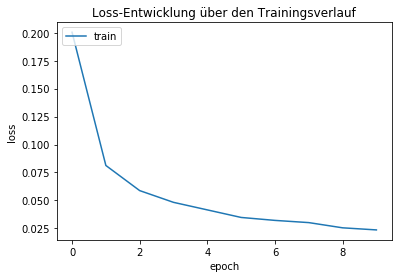

In [55]:
plt.plot(training_history.history['loss'])
#plt.plot(training_history.history['val_loss'])
plt.title('Loss-Entwicklung über den Trainingsverlauf')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [10]:
from keras.utils import plot_model
plot_model(model)

## Weiterführende Links

[3D visualization of a CNN](http://scs.ryerson.ca/~aharley/vis/conv/): Die Fakultät Computer Science der Universität Ryerson, Kanada hat eine interaktive 3D-Visualisierung entwickelt, um die Funktionsweise von Convolutional Neural Networks nachvollziehbar zu machen.